# CS110 Fall 2019 : Assignment 2 

## LBA: A day in life of a Minervan Part 1

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]  

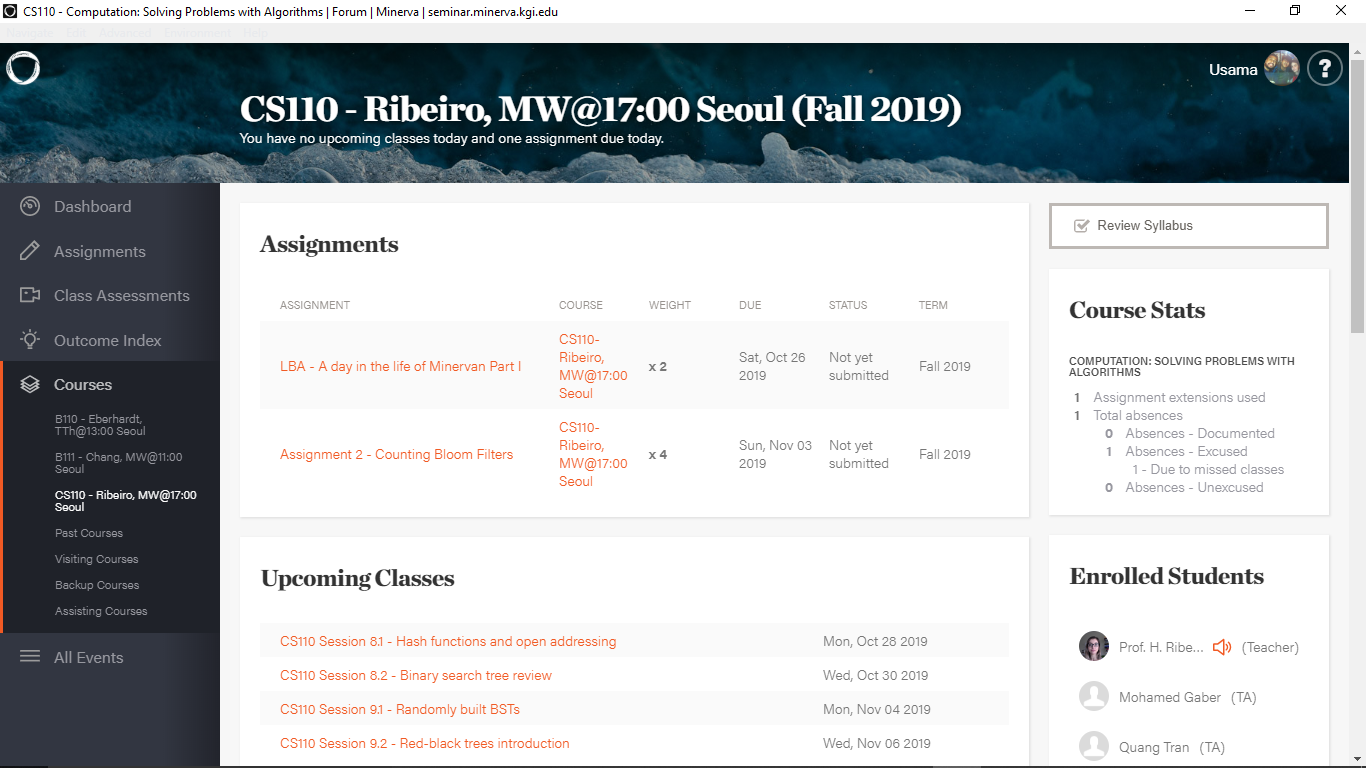

In [1]:
from IPython.display import Image
Image("Screenshot.png")


## Part 2. [#ComputationalSolutions, #DataStructures] 

In [2]:
from IPython.display import Image
Image("Screenshot ''.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

### Explanation of the Table

   The above table shows the activities and the tasks that I plan to do for the purpose of this assignment. As you can see above my table is divided into 5 major activities which is further divided into 3-4 tasks required for that activity. I chose the first activity to be Namsan Tower as it is one of the most beautiful land mark in seoul and is also very clear to our ress hall. The second activity in my table is eating street food at MyongDong. Street food is speciality of seoul that's why to get a better cultural experience I added this as one of my activity. The third one i chose is getting a sim card. As this is one of the major necessities when you move to another city. It not only keep us connected in the city but also helps us navigate the city while visiting an unknown place. The fourth activity I chose was trying Korean BBQ as this is one of the things because of which korean cuisine is famous in all the world. The last one I chose was CS110 LBA as I had to choose something related to a student life in Korea.



## Part 3. [#ComputationalSolutions]

### For multitasking tasks, how would you determine the optimal partitioning time? Test atleast 2 different values or strategies and analyze their computational behavior.

### Answer:

 I have taken a slightly different approach without using partitioning and without dividing the multitasking into chunks. My algorithm is a very simple type of task scheduler and is based on priority queues and priority values of different tasks which was calculated depending on their dependencies and multitasking.

### Working of my Algorithm:

This algorithm is based on heaps data structure that we studied in the session 4.1 and the heap class that we created in the pre-class work of the session. Although my Algorithm takes a is a bit different input as my lists contain 6 attributes including the initial priority, Total time required by the task, and the unique ID for the tasks. I used the ID numbers so that we can easily associate these values with corresponding priority values in case we have similar or equal priority values while executing the Algorithm. 

### Assumptions:

1. The time duration of the tasks is not update as it was not required for my Algorithm to run. 
2. Any number of tasks can run at the same time if they are multitasking. 
3. The priority values of the corresponding tasks depend on their dependencies and the number of tasks dependent on them. Moreover, the multitasking ability of  task also effects their priority value.
4. The statues of the tasks is not updated anywhere in the algorithm is it was not required for my algorithm.
5. Multitasking is only possible for a task if they are in same activity ad they have no dependencies.
6. We are executing this schedular by prioritizing activities as a whole. Tasks from one activity cannot effect the tasks in another activity and multitasking is happening in tasks that are required for the same activity


After initializing the heap class , My algorithm calculates the specific priorities of the tasks based on their dependencies and their ability to multitask. One thing should be noted that all the tasks are initialized with the same priority value i.e. zero. The priority value is calculate based on the following conditions:
1. It increases by 10 if the task has no dependencies.
2. The number of tasks dependent on a task increases its priority by 5
3. If a task is not a multitask its priority increases by 10 as it needs full attention.
4. The ability of multitasking decreases the priority of a task by 5.

Here we can see that much focus is laid on dependencies. As we need to execute these tasks first so that other tasks depending on it can be executed after that. So by the above mentioned conditions we can easily get the idea of which tasks should be prioritized and they reason beind that.


After calculating the respective priority values of all the tasks we make a dictionary where all these priority values correspond to their specific task ID number. I am a type of person who can only do one activity at one time and devote my full attention to the task. Moreover, I will start the second activity only if i am fully done with my first one. So, this makes my analyses much simpler leading me to just sort my activities by the total priority of the tasks within that activity. Though I further sorted the tasks within the same activity based on the task's respective priority value. This whole sorting tasks and activities is done by heaps as i create a max heap of the task's and activity's priority value and take the root element of the max heap. After that I remove the root value and create another maxheap using heapify to generate the second largest element of the heap.


### Another Approach:

Another Approach, in this case would be to partition the multitasking subtasks and use subdivision to divide these multitasking subtasks into chunks. Fot that we will need to have all the multitasking together in a separate list whereas, all other tasks separately. Assuming that only 2 multitasking subtasks can be performed at the same time we can calculate the total time to execute these subtasks by dividing their total time on the total time of the chunks they are divided into. FOr example we have a task that is 10 minutes and another task that is 15 minutes. The total chunk time is we gave to them is 10 minutes. Here the first task will take 10 minutes of its total time, and second task will take  the 5 minutes. SO now we are remaining with only 5 minutes of the second task. We again give it the chunk total time of 10 minutes but doing this will waste 5 minutes from our total time which means this task scheduler approach is not efficient enough


### Conclusion:

The approach I am using for my task scheduler is is very simplistic and easy to understand.Since my scheduler sorts the tasks within their specific activity and then sorts out activities as a whole. This whole sorting is done on the bases of their priorities which is calculated by the task's multitasking ability and the total dependencies of the task. The overall time it tkes for the tasks to be executed is the maximum time given to these takse. So, in this way my algorithm id different form the alternative approach described above as it doesnot optimize time based on the multitasking of the tasks.

##  Part 4. [#PythonProgramming, #CodeReadability]

### Write a Task Priority Scheduler in Python 3, which receives the list of tasks above as input and returns an optimal task schedule for you to follow. Please refrain from using any external Python library besides the random module.

In [4]:
# Defining binary tree functions

def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent


# Defining the Python class MaxHeapq to implement a max heap data structure.
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method.
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0

    # This method returns the highest key in the priority queue. 
    def maxk(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the INCREASE_KEY operation, which modifies the value of a key
    # in the max priority queue with a higher value. 
    def increase_key(self, i, key): 
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] < self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

#Defining a class for the taskes that could take all the attributes of the tasks 
class Node:
    tasklist = [] #store all tasks attributes
    def __init__(self, name, ID=None, tt = None, multitasking= False, dependencies =list , priority=0):
        self.name = name
        self.ID = ID #This will be the unique identity of the task
        self.tasktime = tt #time required to do the task, default: None
        self.multitasking = multitasking
        self.priority = priority # The initial priority of all the tasks is set to zero
        self.dependencies= dependencies
        self.tasklist.append(self)


#This function creates a dictionary where the task ID is its key and all the rest attributes are the values
#This functions make it easier to call the tasks from its unique ID 
def fill_table(taskslists):
    for i in taskslists:
        tasktable[str(i.ID)]=i

#This function applies different conditions and computes the priorities of the tasks based on their
#dependencies and ability of multitasking
def scheduler(tasktable):
        for i in tasktable:
            if len(tasktable[i].dependencies) == 0: #First condition if the task has no dependencies
                tasktable[i].priority += 10
            else:
                for j in tasktable[i].dependencies: #This condition increases the priority if a task has
                    j=str(j.ID)                     #Other tasks dependent on it
                    tasktable[j].priority+=5
            if tasktable[i].multitasking==False:   #This condition increased the priority based on the ability
                tasktable[i].priority+=10         # of the task to multitasking
            else:
                tasktable[i].priority-=5

#This function calculates the individual time of the activities and append them to a dictionary 
# with key values as the ID of the activities
def activity_time(activities):
    for i in activities:
        t=0
        for j in i.dependencies:
            t+=j.tasktime
        timelst.append(t)
        time[str(i.ID)]=t
        
        
#This function takes all the activities as its inputs and computes their total priorities
#It also sorts out the activities based on their priorities
def activity_priorities(activities): 
    for i in activities:
        p=0
        for j in i.dependencies:
            p+= j.priority     #Calculating total priorities in an activity
        lst.append(p)
        priorities[str(i.ID)]=p    #Appending all the values to a dictionary with key values as their ID's
    my_heap = MaxHeapq()           #Applying Heap class to get the activity of maximum priority
    for key in lst:                # Also sorts the priorities of activities in decending order
        my_heap.heappush(key)    
    sortedlst= my_heap.heap
    sortedlst[3],sortedlst[4]=sortedlst[4], sortedlst[3]   
    for i in sortedlst:
        for j in priorities:
            if i==priorities[j]:
                ids.append(j)

#This function takes all the tasks within activities as its inputs and sorts them out within the activities
#Based on their priorities
def calc_priorites(l): 
    before_sorting = []
    pri_dict = {}
    id_s = []
    for i in l:
        p=i.priority
        for j in i.dependencies:
            p += j.priority
        before_sorting.append(p)
        pri_dict[str(i.ID)]=p
    my_heap = MaxHeapq()
    for key in before_sorting:
        my_heap.heappush(key)
    sortedlst= my_heap.heap  
    for i in sortedlst:
        for j in pri_dict:
            if i==pri_dict[j]:
                id_s.append(j)
    print(getNames(l, id_s))


#This function Iterates throught the list of sorted tasks with their ID's and returns the 
#Specific names of the tasks
def getNames(l, id_s):
    names = []
    for i in id_s:
        for j in l:
            if j.ID==int(i):
                names.append(j.name)
    return names

#This function prints the Activities based on their decending order of priorities also calculates thier total time 
def executer():
    for i in ids:
        for j in activities:
            if j.ID==int(i):
                print(j.name)  
                print('This activity will take about', time[i], 'minutes')
    print('These activities will take total time of', sum(timelst) ,'minutes')

#This is a final finction that gives input to all the other functions and generated the final output
def final_task_schedular():
    print("You should spend the day with activities in the following order:")
    fill_table(taskslists)
    scheduler(tasktable)
    fill_table(activities)
    activity_time(activities)
    activity_priorities(activities)
    executer()
    print('------------------------------------------------------------------------------------------------------')
    print('While doing the activities in this order you can save more tive by doing the tasks in an activity in the following order')
    print(activities[4].name)
    calc_priorites(activities[4].dependencies)
    print(activities[2].name)
    calc_priorites(activities[2].dependencies)
    print(activities[1].name)
    calc_priorites(activities[1].dependencies)
    print(activities[0].name)
    calc_priorites(activities[0].dependencies)
    print(activities[3].name)
    calc_priorites(activities[3].dependencies)    
                    
    


#Individual tasks and their Attributes
#They are clearly written on the table displayed above
Namsan_route = Node(ID=701, name = "Search Namsan Route", tt = 10, multitasking= True, dependencies =[], priority = 0)
Namsan_hike = Node(ID=702,name = "Hike to Namsan Tower", tt = 40, multitasking= True, dependencies =[Namsan_route], priority = 0)
listen_music = Node(ID=703,name = "Listen to Music", tt = 20, multitasking= True, dependencies =[], priority = 0)
time_at_namsan = Node(ID=704,name = "Spending Time at Namsan", tt = 90, multitasking= True, dependencies =[Namsan_route, Namsan_hike] , priority = 0)
reach_myongdong = Node(ID=705,name = "Reach Myongdong", tt = 40, multitasking= True, dependencies =[], priority = 0)
Street_food = Node(ID=706,name = "Eat Street Food", tt = 60, multitasking= True, dependencies =[reach_myongdong] , priority = 0)
friends_time = Node(ID=707,name = "Spend Time with Friends", tt = 90, multitasking= False, dependencies =[], priority = 0)
ride_for_sim = Node(ID=708,name = "Reach Sim Shop", tt = 30, multitasking= True, dependencies =[], priority = 0)
sim_registration = Node(ID=709,name = "Sim Registration", tt = 20, multitasking= False, dependencies =[ride_for_sim] , priority = 0)
call_family = Node(ID=710,name = "Call Family", tt = 40, multitasking= False, dependencies =[sim_registration] , priority = 0)
find_bbq_place = Node(ID=711,name = "Search Korean BBQ place", tt = 10, multitasking= True, dependencies =[], priority = 0)
reach_bbq_place = Node(ID=712,name = "Reach Korean BBQ Place", tt = 20,multitasking= True, dependencies =[find_bbq_place] , priority = 0)
eat_kbbq = Node(ID=713,name = "Eat Korean BBQ", tt = 60, multitasking= True, dependencies =[find_bbq_place,reach_bbq_place] , priority = 0)
revise_concepts = Node(ID=714,name = "Revise CS concepts", tt = 90, multitasking= False, dependencies =[] , priority = 0)
write_code = Node(ID=715,name = "Write code for LBA", tt = 150, multitasking= False, dependencies =[revise_concepts] , priority = 0)
write_cs_lba = Node(ID=716,name = "Write CS110 LBA", tt = 150, multitasking= False, dependencies =[revise_concepts,write_code], priority = 0)

#Parent List of all the tasks
taskslists = [Namsan_route, Namsan_hike, listen_music, time_at_namsan, reach_myongdong, Street_food, 
              friends_time, ride_for_sim, sim_registration, call_family, find_bbq_place, reach_bbq_place, 
              eat_kbbq, revise_concepts, write_code, write_cs_lba]


#Activities And tasks within the activities
Namsan_hike_activity=Node(ID=1,name="Namsan Hike Activity",dependencies=[Namsan_route,Namsan_hike,listen_music,time_at_namsan])
MyongDong_activity=Node(ID=2, name='MyongDong Street Food Activity',dependencies=[reach_myongdong, Street_food,friends_time])
Sim_card_activity=Node(ID=3, name='Sim Card Activity',dependencies=[ride_for_sim, sim_registration,call_family])
Korean_bbq_activity=Node(ID=4, name='Korean BBQ Activity',dependencies=[find_bbq_place,reach_bbq_place,eat_kbbq])
CS110_lba_activity=Node(ID=5,name='CS110 LBA Activity',dependencies=[revise_concepts,write_code,write_cs_lba])

#parent list of all acticities
activities=[Namsan_hike_activity,MyongDong_activity,Sim_card_activity,
            Korean_bbq_activity,CS110_lba_activity]

#Empty dictionaries, lists, and final execution of the scheduler to generate the output
timelst=[]
lst=[]
ids=[]
tasktable={}
priorities={}
time ={}
final_task_schedular()





You should spend the day with activities in the following order:
CS110 LBA Activity
This activity will take about 390 minutes
Sim Card Activity
This activity will take about 90 minutes
MyongDong Street Food Activity
This activity will take about 190 minutes
Namsan Hike Activity
This activity will take about 160 minutes
Korean BBQ Activity
This activity will take about 90 minutes
These activities will take total time of 920 minutes
------------------------------------------------------------------------------------------------------
While doing the activities in this order you can save more tive by doing the tasks in an activity in the following order
CS110 LBA Activity
['Write CS110 LBA', 'Revise CS concepts', 'Write code for LBA']
Sim Card Activity
['Sim Registration', 'Call Family', 'Reach Sim Shop', 'Sim Registration', 'Call Family']
MyongDong Street Food Activity
['Spend Time with Friends', 'Eat Street Food', 'Reach Myongdong']
Namsan Hike Activity
['Search Namsan Route', 'Hike to 

### Benefits of My Algorithm

1. This scheduler implements priority queues and heaps to sort out th tasks which is a very efficient data structure.
2. The approach behind this task is very simplified which means it is very straight forward to understand how the code works and what kinds of operations are taking place inside this algorithm .
3. This algorithm helps us to find the actual schedule wuith the with the task by task execution of the activities and also output the total time taken by the tasks in the schedule.
4. This algorithm also works through all the constraints that were given to us in the instructions of this assignment, such as it didn't use any external liberaries and build a max-heapwithin itsepf. It mostly outputted the things we needed but didnt show the change in duration and the status of the respective tasks as it was not required for the execution of our Algorithm.


## Part 5. [ComputattionalCritique] 

### Produce a critical analysis of your scheduler, highlighting all the benefits in following the algorithmic directives and any failure modes it runs into.


### Analyses

Since we are using a binary heap data structure, it is very simple and efficient as we only need two operations in this data structure: Inserting an element and removing the most significant (In my case the one with highest priority) item form the max heap. And since we have already sorted the tasks within the activities and out priority values count for both whether the task is multitasking or not we only needed to build a priority queue from the activities where the priority value for the activities would be the summed priority value of the tasks in that activity. The Priority queues in my Algorithm works with these properties:
1. A task with higher priority is dequeued before the task with relatively lower priority
2. If two elements have the same priority then they are executed according to their order in the queue
3. This whole process works until there are no elements in the queue.

### Analyses for Insertion Function:

Now, As we know that the number of operations executed when calling cinsertion functions depends on the number of levels the new element is rising to satisfy the max heap property. Implying the average case scenario insertion function has a time complexity of O(1), while the worst cas scenario has a time complexity of O(logn). These complexities are discussed below:

### Worst Case Analyses of Insertion function:

Assuming the worst case scenario where the element inserted is the max and time time complexity is O(logn) as we have to move this element from the leaves (bottom of the tree) to the roots or somewhere near that. The height of the binary tree is log2 in an n element's list. For instance we need to divide the elements into two parts until we reach the base case of 1 iteam without any more children given by the equation n/2^k=1. In this scenario k is log2n. This means that the number of comaprisons and swaps we need in order to move the element to its right position (to the root in this scenario since the element id the maximum) is almost O(log2n).

### Average Case Analyses if Deletion function :

For the average case of the same insertoin function discussed above we can use the average distribution of the elements within a heap where all the elements have a probability of 0.5(1/2) of being at a certain height at the tree. Mostly it requires only one comparison and no swaps but at the same time it has a probability of (0.25)(1/4) of being at height h-1 which requires 2 comparisons and one swap and this probability continues on. So, now if we use this knowledge we get the average number of expected steps taken that will be equal to 1*1/2 + 2*1/4 + 3*1/8 ... using the summation formula on this expression we get the average complexity of O(1) in this average case scenario.

### Analyses of Deletion function: 

As we know that the deletion function has the time complexity of O(log2n) for both average case scenario and the worst case scenario. It works similarly because in the worst case the element is deleted form the root and then we heapify to satisfy the heap property. After this deletion we swap one of the child nodes of the deleted nodes with the new node that was empty after the deletion and this swap goes all the way down to the last child node at the tree. So this swaping requires us to go all the way down to the last child of the tree for which we already made calculations above so it means the dept would be O(log2n).



### Conclusion:

All of the operations mentioned above are either constant or a lograthmic value, This shows that this Algorithm saves alot of time and is very efficient in terms of time complexity. This is the main reason why priority queues are based on heaps are implemented in this Algorithm. However, my Algorithm other than the heaps and priority queues is very inefficient since it goes through all the values again and again within the list of tasks, and because i used nested for loops again and again making the overall time complexity of my Algorithm much higher.  Although this idoesnot seem to effect my algorithm as the input size is much smaller but had there been an input of 1000 elements. This Algorithm would have taken forever to generate the output and will prove to be highly inefficient.


### Limitations of my Algorithm:

#### 1. Non Generalizeable:
This scheduler will not work for generic task tables which means that the out puts generated by this Algorithm will only work for this test case which is used in the Algotithm. This is highly inconvinient in terms of testing since we wont be able to check whether this scheduler works for other test cases or not.

#### 2. Flawed Assumptions:
Some of the premises which are discussed in the Part 3 does not hold true in real life and hence are mere assumptions. For example, most of the time people cannot execute more than one tasks at the same time (depending on the nature of the task) and sometimes most of the people can work through different tasks in different activities in order to optimize the their time.


## Implementation of HC's:

#### #Strategize:

Here I used this HC to explains why specific conditions to compute the priorities of specific tasks support my strategic approach while algorithmically solving this problem. Moreover, I also analyzed the relative strengths and weaknesses of this aproach and explained the strategic implementation of this Algorithm

#### #Breakitdown:
Here I used this HC to effectively decompose the problem into sub problems and then implemented it Algorithmically. For example i first compute the priorities of the tasks and then implemented the heapsort on the values of the priorities. This HC was used time and again inorder to come up with a approach to solve this assignment.

#### #Critique:
Here I used this HC to effectively critique my ALgorithm by mentioning its flaws and limitations based on logical reasoning. I also mentioned the ways how this problem can be approached differently and how it that alternate strategy would be different from the one implemented 

